In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:09<00:00, 139MB/s]
100% 1.06G/1.06G [00:09<00:00, 120MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# import basic packages
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

In [ ]:
# first target train data
train_ds= keras.utils.image_dataset_from_directory(directory='/content/train',
                                                   labels='inferred',
                                                   label_mode='int',
                                                   batch_size=32,
                                                   image_size=(256,256))
validation_ds= keras.utils.image_dataset_from_directory(directory='/content/test',
                                                   labels='inferred',
                                                   label_mode='int',
                                                   batch_size=32,
                                                   image_size=(256,256))


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# data normalization is mandatory
def process(image, label):
  image= tf.cast(image/255., tf.float32)
  return image, label

In [ ]:
train_ds= train_ds.map(process)
validation_ds= validation_ds.map(process)

# create CNN model-AlexNet Archetecture
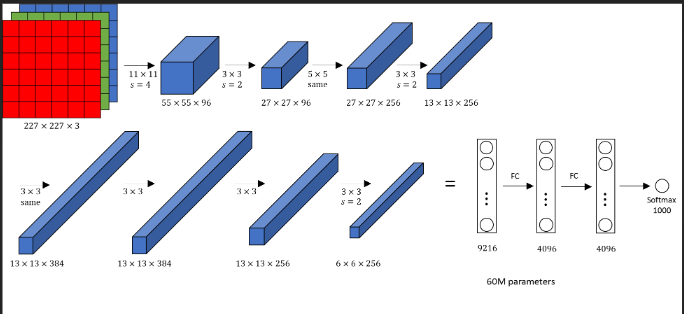

In [ ]:
model=Sequential()
model.add(Conv2D(96, kernel_size=(11,11), padding='valid',
                 strides=4, activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))

model.add(Conv2D(256, kernel_size=(5,5),padding='same',
                activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=3, padding='valid'))

model.add(Conv2D(384, kernel_size=(3,3), padding='same',
                 activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(384, kernel_size=(3,3), padding='valid',
                 activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3,3), padding='same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))

# flatten

model.add(Flatten())

model.add(Dense(9216, activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 62, 62, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 30, 30, 256)       1024      
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(train_ds, validation_data=validation_ds,
                  epochs=10)

Epoch 1/10
625/625 [==============================] - 65s 86ms/step - loss: 1.1203 - accuracy: 0.5857 - val_loss: 0.9765 - val_accuracy: 0.5368
Epoch 2/10
625/625 [==============================] - 54s 84ms/step - loss: 0.6119 - accuracy: 0.6770 - val_loss: 0.5933 - val_accuracy: 0.6712
Epoch 3/10
625/625 [==============================] - 53s 85ms/step - loss: 0.5473 - accuracy: 0.7317 - val_loss: 0.5334 - val_accuracy: 0.7472
Epoch 4/10
625/625 [==============================] - 54s 86ms/step - loss: 0.4345 - accuracy: 0.8065 - val_loss: 0.9217 - val_accuracy: 0.6524
Epoch 5/10
625/625 [==============================] - 54s 87ms/step - loss: 0.3687 - accuracy: 0.8422 - val_loss: 0.8382 - val_accuracy: 0.7128
Epoch 6/10
625/625 [==============================] - 52s 83ms/step - loss: 0.3125 - accuracy: 0.8713 - val_loss: 0.5511 - val_accuracy: 0.7284
Epoch 7/10
625/625 [==============================] - 54s 86ms/step - loss: 0.2707 - accuracy: 0.8903 - val_loss: 0.3005 - val_accuracy:

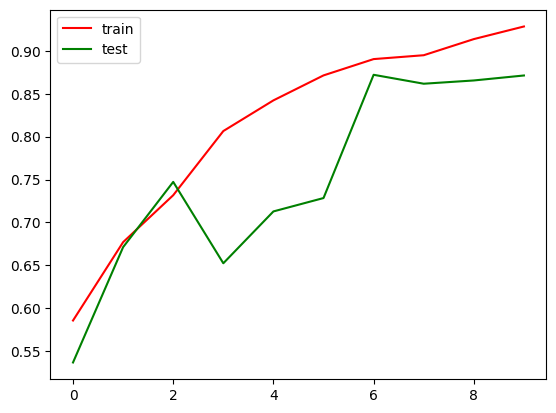

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='test')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_image=cv2.imread('/content/kitty-cat-kitten-pet-45201.jpeg')

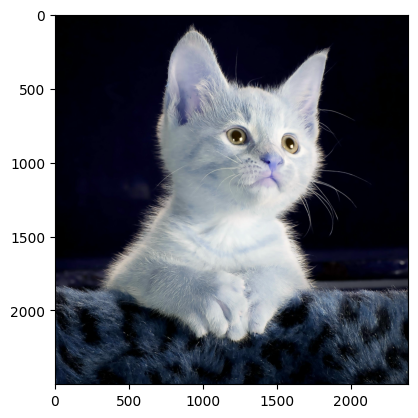

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(2500, 2392, 3)

In [ ]:
test_image=cv2.resize(test_image, (256,256))

In [ ]:
test_image.shape

(256, 256, 3)

In [ ]:
test_input= test_image.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 597ms/step


array([[0.]], dtype=float32)

In [ ]:
## again with VGG16 architecture
# try with cancer detection dataset

In [ ]:
# feature extraction in vgg16


# feature extraction in vgg16
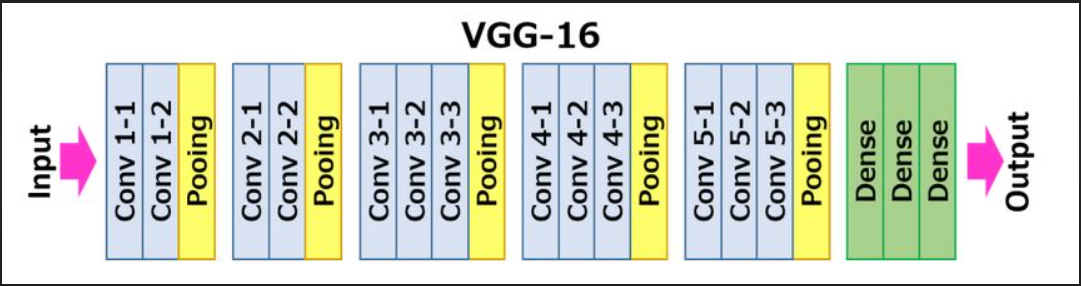

In [ ]:
# transfer lerning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten

from keras.applications.vgg16 import VGG16

In [ ]:
# include to= True- data is changable
# include top= False - data is non-changable
conv_base = VGG16(include_top=False, weights='imagenet',
                  input_shape=(256,256,3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               8388864   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23103809 (88.13 MB)
Trainable params: 23103809 (88.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1=model.fit(train_ds, validation_data=validation_ds,
                  epochs=5)

Epoch 1/5
625/625 [==============================] - 380s 560ms/step - loss: 0.7785 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
625/625 [==============================] - 333s 532ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
625/625 [==============================] - 332s 531ms/step - loss: 0.6932 - accuracy: 0.4989 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
625/625 [==============================] - 350s 559ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
625/625 [==============================] - 350s 559ms/step - loss: 0.6932 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
